In [44]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
file_path = "CSV/Passatgers.csv"
df = pd.read_csv(file_path)

print(df.head())

           ds       y
0  1978-01-01  381224
1  1978-02-01  356039
2  1978-03-01  499520
3  1978-04-01  496170
4  1978-05-01  633790


In [46]:
print(df.tail())

             ds        y
387  2010-04-01  2683357
388  2010-05-01  3149462
389  2010-06-01  3339929
390  2010-07-01  3797878
391  2010-08-01  3892873


In [47]:
m = Prophet()
m.fit(df)

19:02:43 - cmdstanpy - INFO - Chain [1] start processing


19:02:43 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods=12, freq='MS')
future.tail()

,ds
399,2011-04-01
400,2011-05-01
401,2011-06-01
402,2011-07-01
403,2011-08-01


In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
399,2011-04-01,3.400550e+06,3.137502e+06,3.647962e+06
400,2011-05-01,3.552233e+06,3.266766e+06,3.816816e+06
401,2011-06-01,3.649216e+06,3.387178e+06,3.921641e+06
402,2011-07-01,3.799547e+06,3.551075e+06,4.046353e+06
403,2011-08-01,3.807204e+06,3.559596e+06,4.062198e+06


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


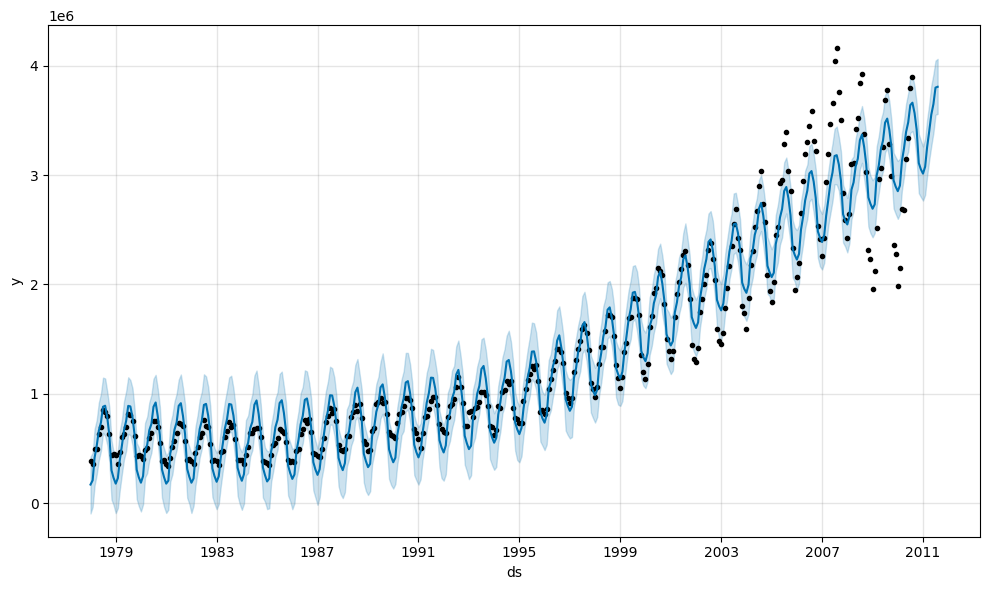

In [50]:
fig1 = m.plot(forecast)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

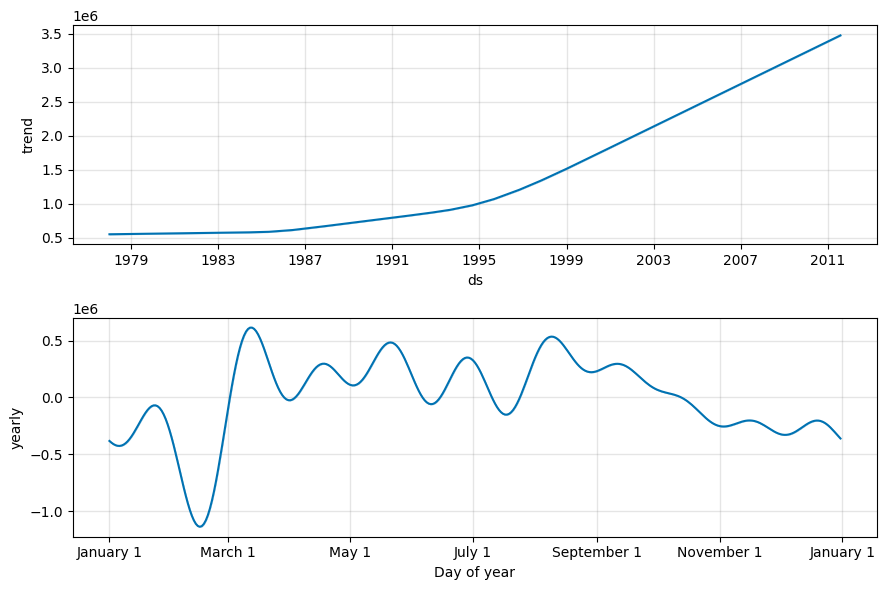

In [51]:
fig2 = m.plot_components(forecast)

In [52]:
# Calcular métricas de evaluación
y_true = df['y'].values  # Valores reales del DataFrame original
y_pred = forecast[-len(df):]['yhat'].values  # Predicciones del modelo para el mismo número de períodos que en el DataFrame original

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Calcular la media de los valores reales en el conjunto de prueba
mean_y_true = np.mean(y_true)

# Relacionar MAE y RMSE con la media de los valores reales
mae_percentage = (mae / mean_y_true) * 100
rmse_percentage = (rmse / mean_y_true) * 100

print(f'Media de los valores reales: {mean_y_true}')
print(f'MAE: {mae} ({mae_percentage:.2f}%)')
print(f'RMSE: {rmse} ({rmse_percentage:.2f}%)')



MAE: 172814.80456477008
RMSE: 230923.71976352757
Media de los valores reales: 1353298.918367347
MAE: 172814.80456477008 (12.77%)
RMSE: 230923.71976352757 (17.06%)
